In [2]:
import pandas as pd
import numpy as np

In [4]:
# !ls ../data/probase/data-concept/

In [5]:
# !head ../data/probase/data-concept/data-concept-instance-relations.txt

In [6]:
# !tail ../data/probase/data-concept/data-concept-instance-relations.txt

In [7]:
probDF = pd.read_csv('../data/probase/data-concept/data-concept-instance-relations.txt',header=None, sep='\t')

In [8]:
probDF.columns=['node1_label', 'node2_label', 'no_of_relations']

In [9]:
probDF.head(20)

,node1_label,node2_label,no_of_relations
0,factor,age,35167
1,free rich company datum,size,33222
2,free rich company datum,revenue,33185
3,state,california,18062
4,supplement,msm glucosamine sulfate,15942
5,factor,gender,14230
6,factor,temperature,13660
7,metal,copper,11142
8,issue,stress pain depression sickness,11110
9,variable,age,9375


In [10]:
probDF.tail(20)

,node1_label,node2_label,no_of_relations
33377300,single event service,iso 3rd party auditing,1
33377301,single event service,professional speaker,1
33377302,lip pad,crayon,1
33377303,ationals,dupont,1
33377304,well established accident scenario,station blackout condition,1
33377305,outreach support,homecare,1
33377306,outreach support,warden,1
33377307,sugar laden snack,candy bar,1
33377308,sugar laden snack,breads with sugar,1
33377309,sugar laden snack,items with frosting,1


In [11]:
len(probDF)

33377320

<AxesSubplot:>

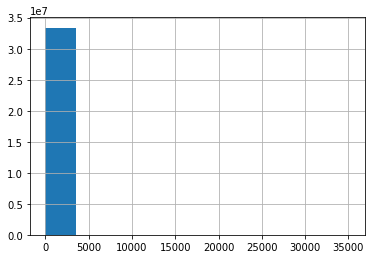

In [12]:
probDF.no_of_relations.hist()

<AxesSubplot:>

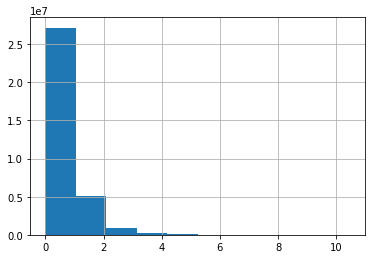

In [13]:
probDF.no_of_relations.transform(np.log).hist()

In [14]:
probDF.no_of_relations.describe()

count    3.337732e+07
mean     2.549671e+00
std      2.153597e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.516700e+04
Name: no_of_relations, dtype: float64

In [15]:
# import nltk

In [16]:
# temp = probDF[probDF.node1_label.apply(lambda p: "eating" in str(p))]

In [17]:
# temp[temp.node1_label.apply(lambda p: "eating" in nltk.word_tokenize(str(p)))]

In [18]:
# probDF[probDF.node1_label.apply(lambda p: p == "eating")]

In [19]:
# probDF[probDF.node1_label.apply(lambda p: p == "eat")]

# Compare with wordsim dataset

In [20]:
wordSimDF = pd.read_csv("../data/wordsim.csv")

In [21]:
len(wordSimDF)

349

In [22]:
wordSimDF.head()

,Word 1,word1_kg_id,word1_kg_label,word1_kg_description,Word 2,word2_kg_id,word2_kg_label,word2_kg_description,Human (Mean),complex,transe,text,class
0,admission,Q847337,confession,statement made by a person or a group of perso...,ticket,Q551800,ticket,paper or cardboard document showing payment fo...,5.5360,0.361115,0.446632,0.485653,NaN
1,alcohol,Q154,alcoholic beverage,"drink containing alcohols, typically ethanol",chemistry,Q2329,chemistry,branch of physical science concerned with the ...,4.1250,0.302163,0.274388,0.479313,0.005851
2,aluminum,Q663,aluminium,metallic chemical element of silvery appearanc...,metal,Q11426,metal,"element, compound or alloy that is a good cond...",6.6250,0.694462,0.429289,0.626784,0.393657
3,announcement,Q567303,announcement,"printed, spoken, or published statement or not...",effort,Q14536140,exertion,use of physical or perceived energy by a person,2.0625,0.324825,0.379077,0.618644,0.208812
4,announcement,Q567303,announcement,"printed, spoken, or published statement or not...",news,Q38926,news,communication of selected information on curre...,7.1875,0.361214,0.360383,0.863846,0.888621


In [23]:
wordSimDFSet = set(wordSimDF.word1_kg_label.to_list() + wordSimDF.word2_kg_label.to_list())
wordSimDF_Map = {**{word: qnode for (word, qnode) in zip(wordSimDF['Word 1'].to_list(), wordSimDF['word1_kg_id'].to_list())}, **{word: qnode for (word, qnode) in zip(wordSimDF['Word 2'].to_list(), wordSimDF['word2_kg_id'].to_list())}}


In [24]:
# wordSimDF_Map

In [25]:
probDF1 = probDF.apply(lambda p: p.node1_label in wordSimDFSet or p.node2_label in wordSimDFSet, axis=1)

In [26]:
probDF2 = probDF[probDF1]

In [27]:
print(f"From having {len(probDF)} statements in the probase file, we have {len(probDF2)} statements such that either node1 or node2 is a label in our wordsim dataset")


From having 33377320 statements in the probase file, we have 2185019 statements such that either node1 or node2 is a label in our wordsim dataset


In [28]:
len(wordSimDFSet)

419

In [29]:
probDF2.head()

,node1_label,node2_label,no_of_relations
1,free rich company datum,size,33222
5,factor,gender,14230
7,metal,copper,11142
10,information,name,9274
22,material,metal,7809


<AxesSubplot:>

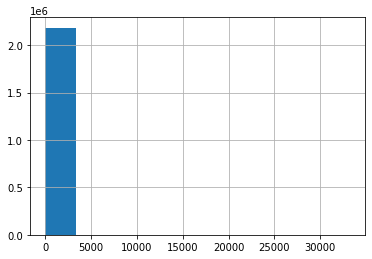

In [30]:
probDF2.no_of_relations.hist()

<AxesSubplot:>

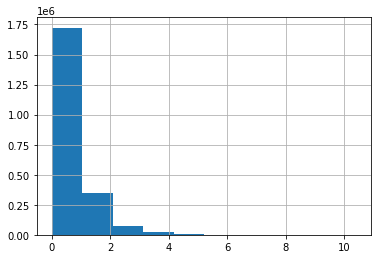

In [31]:
probDF2.no_of_relations.transform(np.log).hist()

In [32]:
probDF2.no_of_relations.describe()

count    2.185019e+06
mean     3.606209e+00
std      4.296483e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      3.322200e+04
Name: no_of_relations, dtype: float64

In [33]:
probDF2.no_of_relations.transform(np.log).describe()

count    2.185019e+06
mean     4.872647e-01
std      8.086201e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.931472e-01
max      1.041097e+01
Name: no_of_relations, dtype: float64

In [34]:
probDF_Qnodes_DF = probDF.copy()
probDF_Qnodes_DF['node1_qnode'] = probDF_Qnodes_DF.node1_label.apply(lambda p: wordSimDF_Map[p] if p in wordSimDF_Map else None)
probDF_Qnodes_DF['node2_qnode'] = probDF_Qnodes_DF.node2_label.apply(lambda p: wordSimDF_Map[p] if p in wordSimDF_Map else None)


In [35]:
(~probDF_Qnodes_DF['node1_qnode'].isna()).sum(), (~probDF_Qnodes_DF['node2_qnode'].isna()).sum()

(2182983, 616497)

# Labels File Read

In [36]:
labelsDF = pd.read_csv('../data/labels.en.tsv', sep='\t')

In [37]:
len(labelsDF)

76799433

In [38]:
labelsDF['node2'] = labelsDF.node2.apply(lambda p: p[1:-4])

In [39]:
labelsDF.head()

,id,node1,label,node2
0,P10-label-en,P10,label,video
1,P1000-label-en,P1000,label,record held
2,P1001-label-en,P1001,label,applies to jurisdiction
3,P1002-label-en,P1002,label,engine configuration
4,P1003-label-en,P1003,label,National Library of Romania ID


In [40]:
labelsDF_indexed = labelsDF.set_index('node2')

In [41]:
labelsDF_indexed.head()

,id,node1,label
node2,,,
video,P10-label-en,P10,label
record held,P1000-label-en,P1000,label
applies to jurisdiction,P1001-label-en,P1001,label
engine configuration,P1002-label-en,P1002,label
National Library of Romania ID,P1003-label-en,P1003,label


In [42]:
probDF_Qnodes_DF1 = probDF_Qnodes_DF.set_index('node1_label').join(labelsDF_indexed)

In [43]:
probDF_Qnodes_DF1 = probDF_Qnodes_DF1.reset_index().rename(columns={'index': 'node1_label'})

In [45]:
probDF_Qnodes_DF1.head()

,node1_label,node2_label,no_of_relations,node1_qnode,node2_qnode,id,node1,label
0,--neat feature,riddled --neat feature,1,None,None,NaN,NaN,NaN
1,--neat item,pretty --neat item,1,None,None,NaN,NaN,NaN
2,--neat thing,display other --neat thing,1,None,None,NaN,NaN,NaN
3,-acoustic,inaudible range -acoustic,1,None,None,NaN,NaN,NaN
4,-aesthetic,traditional static -aesthetic,1,None,None,NaN,NaN,NaN


In [46]:
probDF_Qnodes_DF2 = probDF_Qnodes_DF1.set_index('node2_label').join(labelsDF_indexed, rsuffix='_right')

In [47]:
probDF_Qnodes_DF2 = probDF_Qnodes_DF2.reset_index().rename(columns={'index': 'node2_label'})

In [48]:
len(probDF_Qnodes_DF2)

72760156

In [52]:
probDF_Qnodes_DF2 = probDF_Qnodes_DF2.rename(columns={'node1':'node1_lab_qnode', 'node1_right': 'node2_lab_qnode'}).drop(columns=['label', 'id_right', 'label_right'])

In [53]:
probDF_Qnodes_DF2.head()

,node2_label,node1_label,no_of_relations,node1_qnode,node2_qnode,id,node1_lab_qnode,node2_lab_qnode
0,"''-large , complex program",program,1,None,None,Q4303335-label-en,Q4303335,NaN
1,"''-large , complex program",program,1,None,None,Q66545460-label-en,Q66545460,NaN
2,'-end formation signal,signal,1,None,None,Q174984-label-en,Q174984,NaN
3,'-end formation signal,signal,1,None,None,Q2150504-label-en,Q2150504,NaN
4,'-end formation signal,signal,1,None,None,Q2918103-label-en,Q2918103,NaN


In [54]:
(~probDF_Qnodes_DF2.node1_qnode.isna()).sum(), (~probDF_Qnodes_DF2.node2_qnode.isna()).sum()

(9909668, 2258909)

In [57]:
probDF_Qnodes_DF2['n1_final_qnode'] = probDF_Qnodes_DF2.apply(lambda p: p['node1_qnode'] if p['node1_qnode'] else p['node1_lab_qnode'], axis=1)
probDF_Qnodes_DF2['n2_final_qnode'] = probDF_Qnodes_DF2.apply(lambda p: p['node2_qnode'] if p['node2_qnode'] else p['node2_lab_qnode'], axis=1)

In [68]:
temp2 = probDF_Qnodes_DF2[(probDF_Qnodes_DF2.node1_label == 'target') & (probDF_Qnodes_DF2.node2_label == 'hypothetical protein')]

In [71]:
temp2.node2_lab_qnode.value_counts()

Q62971119    4
Q62917363    4
Q62930721    4
Q62853585    4
Q62963549    4
            ..
Q62962414    4
Q62402669    4
Q62628687    4
Q62644256    4
Q62834883    4
Name: node2_lab_qnode, Length: 35526, dtype: int64

In [63]:
temp = probDF_Qnodes_DF2[['node1_label', 'node2_label']].value_counts()

In [100]:
temp.head()

node1_label      node2_label         
target           hypothetical protein    142104
unknown gene     hypothetical protein     35526
annotation term  hypothetical protein     35526
antigen          hypothetical protein     35526
protein          hypothetical protein     35526
dtype: int64

<AxesSubplot:>

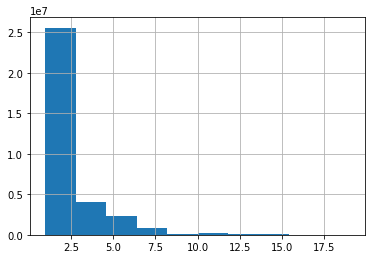

In [106]:
temp[temp<20].hist()

In [76]:
probDF_Qnodes_DF2.head()

,node2_label,node1_label,no_of_relations,node1_qnode,node2_qnode,id,node1_lab_qnode,node2_lab_qnode,n1_final_qnode,n2_final_qnode
0,"''-large , complex program",program,1,None,None,Q4303335-label-en,Q4303335,NaN,Q4303335,NaN
1,"''-large , complex program",program,1,None,None,Q66545460-label-en,Q66545460,NaN,Q66545460,NaN
2,'-end formation signal,signal,1,None,None,Q174984-label-en,Q174984,NaN,Q174984,NaN
3,'-end formation signal,signal,1,None,None,Q2150504-label-en,Q2150504,NaN,Q2150504,NaN
4,'-end formation signal,signal,1,None,None,Q2918103-label-en,Q2918103,NaN,Q2918103,NaN


In [86]:
probDF_Qnodes_DF2_N1_Min = probDF_Qnodes_DF2[['node1_label', 'node2_label', 'no_of_relations', 'n1_final_qnode']].groupby(['node1_label', 'node2_label', 'no_of_relations']).min()

In [87]:
probDF_Qnodes_DF2_N2_Min = probDF_Qnodes_DF2[['node1_label', 'node2_label', 'no_of_relations', 'n2_final_qnode']].groupby(['node1_label', 'node2_label', 'no_of_relations']).min()

In [88]:
probDF_Qnodes_DF2_N2_Min

,,,n2_final_qnode
node1_label,node2_label,no_of_relations,
--neat feature,riddled --neat feature,1,NaN
--neat item,pretty --neat item,1,NaN
--neat thing,display other --neat thing,1,NaN
-acoustic,inaudible range -acoustic,1,NaN
-aesthetic,modernist design -aesthetic,1,NaN
...,...,...,...
zzangs,zzang of the face,1,NaN
zzo formation method,sputtering,1,Q898444
zzt game,deceiving guidance,1,NaN


In [ ]:
probDF_Qnodes_DF2_N2_Min.to

In [90]:
probDF_Qnodes_DF_WQnodes = probDF_Qnodes_DF.set_index(['node1_label', 'node2_label', 'no_of_relations']).join(probDF_Qnodes_DF2_N1_Min).join(probDF_Qnodes_DF2_N2_Min)

In [93]:
probDF_Qnodes_DF_WQnodes1 = probDF_Qnodes_DF_WQnodes.reset_index()

In [94]:
probDF_Qnodes_DF_WQnodes1.head()

,node1_label,node2_label,no_of_relations,node1_qnode,node2_qnode,n1_final_qnode,n2_final_qnode
0,factor,age,35167,None,None,Q15061738,Q100343219
1,free rich company datum,size,33222,None,Q322481,NaN,Q322481
2,free rich company datum,revenue,33185,None,None,NaN,Q850210
3,state,california,18062,None,None,Q17124184,NaN
4,supplement,msm glucosamine sulfate,15942,None,None,Q2915731,NaN


In [95]:
len(probDF_Qnodes_DF_WQnodes1)

33377320

In [97]:
((~probDF_Qnodes_DF_WQnodes1.node1_qnode.isna()) & (~probDF_Qnodes_DF_WQnodes1.node2_qnode.isna())).sum()

11062

In [96]:
((~probDF_Qnodes_DF_WQnodes1.n1_final_qnode.isna()) & (~probDF_Qnodes_DF_WQnodes1.n2_final_qnode.isna())).sum()

1600841

In [107]:
probDF_Qnodes_DF_WQnodes1.node1_label.value_counts()

factor                            364111
feature                           203549
issue                             201986
product                           172106
item                              158829
                                   ...  
skilled non eu worker                  1
theyare disease                        1
sound-generating object                1
credit event related product           1
standard method of instruction         1
Name: node1_label, Length: 5376524, dtype: int64

<AxesSubplot:>

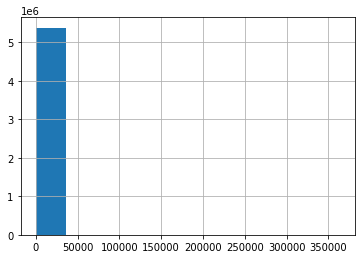

In [109]:
probDF_Qnodes_DF_WQnodes1.node1_label.value_counts().hist()

In [108]:
probDF_Qnodes_DF_WQnodes1.node2_label.value_counts()

water                                 15286
education                             12257
age                                   11843
food                                  11184
default                               10713
                                      ...  
zhongshan ren hing paper                  1
teaching recall                           1
spearman rank correlation coecient        1
deiland centre in playa honda             1
vallis limestone formation                1
Name: node2_label, Length: 12501525, dtype: int64

<AxesSubplot:>

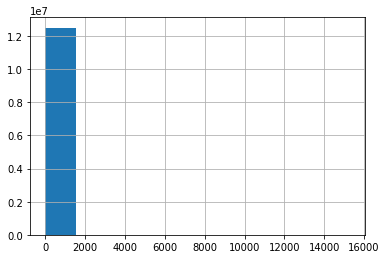

In [110]:
probDF_Qnodes_DF_WQnodes1.node2_label.value_counts().hist()

In [111]:
probDF_Qnodes_DF_WQnodes1.to_csv('../data/probase/probase_WQnodes.csv',index=False)

# Similarity Score Computation

In [6]:
probDF_Qnodes_DF_WQnodes = pd.read_csv('../data/probase/probase_WQnodes.csv')

/nas/home/kshenoy/miniconda3/envs/kgtkEnv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
len(probDF_Qnodes_DF_WQnodes)

33377320

In [8]:
probDF_Qnodes_DF_WQnodes.head()

,node1_label,node2_label,no_of_relations,node1_qnode,node2_qnode,n1_final_qnode,n2_final_qnode
0,factor,age,35167,NaN,NaN,Q15061738,Q100343219
1,free rich company datum,size,33222,NaN,Q322481,NaN,Q322481
2,free rich company datum,revenue,33185,NaN,NaN,NaN,Q850210
3,state,california,18062,NaN,NaN,Q17124184,NaN
4,supplement,msm glucosamine sulfate,15942,NaN,NaN,Q2915731,NaN


In [9]:
probDF_Qnodes_DF_WQnodes1_subset = probDF_Qnodes_DF_WQnodes[(~probDF_Qnodes_DF_WQnodes.n1_final_qnode.isna()) & (~probDF_Qnodes_DF_WQnodes.n2_final_qnode.isna())]

In [11]:
probDF_Qnodes_DF_WQnodes1_subset.head()

,node1_label,node2_label,no_of_relations,node1_qnode,node2_qnode,n1_final_qnode,n2_final_qnode
0,factor,age,35167,NaN,NaN,Q15061738,Q100343219
5,factor,gender,14230,NaN,Q48277,Q15061738,Q48277
6,factor,temperature,13660,NaN,NaN,Q15061738,P2076
7,metal,copper,11142,Q11426,NaN,Q11426,Q15830500
9,variable,age,9375,NaN,NaN,Q10954303,Q100343219


In [17]:
maxNR = probDF_Qnodes_DF_WQnodes1_subset['no_of_relations'].max()
probDF_Qnodes_DF_WQnodes1_subset['sim'] = probDF_Qnodes_DF_WQnodes1_subset['no_of_relations'].apply(np.log10) / np.log10(maxNR)

<ipython-input-17-1027b77e731a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  probDF_Qnodes_DF_WQnodes1_subset['sim'] = probDF_Qnodes_DF_WQnodes1_subset['no_of_relations'].apply(np.log10) / np.log10(maxNR)


In [18]:
probDF_Qnodes_DF_WQnodes1_subset['sim']

0           1.000000
5           0.913568
6           0.909663
7           0.890199
9           0.873703
              ...   
33375112    0.000000
33375113    0.000000
33376416    0.000000
33376502    0.000000
33376773    0.000000
Name: sim, Length: 1600841, dtype: float64

In [19]:
probDF_Qnodes_DF_WQnodes1_subset.to_csv('../data/probase/probase_WQnodes_subset_and_sim.csv')